In [99]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)
pd.set_option('float_format', '{:f}'.format)


In [100]:
#Importing the data 

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000000,0,0.000000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000000,674,2.500000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000000,1532,2.000000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000000,20.000000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000000,305,1.000000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000000,17.000000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000000,1428,1.000000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000000,18.000000,No,No,Modified


In [101]:
df.shape

(9240, 37)

In [102]:
#checking duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0 

True

In [103]:
sum(df.duplicated(subset = 'Lead Number')) == 0 

True

In [104]:
#As customer did not select any option from the list, hence there are select values for many column.
# so Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [106]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending = False)

How did you hear about X Education              78.460000
Lead Profile                                    74.190000
Lead Quality                                    51.590000
Asymmetrique Profile Score                      45.650000
Asymmetrique Activity Score                     45.650000
Asymmetrique Profile Index                      45.650000
Asymmetrique Activity Index                     45.650000
City                                            39.710000
Specialization                                  36.580000
Tags                                            36.290000
What matters most to you in choosing a course   29.320000
What is your current occupation                 29.110000
Country                                         26.630000
TotalVisits                                      1.480000
Page Views Per Visit                             1.480000
Last Activity                                    1.110000
Lead Source                                      0.390000
Lead Origin   

In [107]:
# Conversion Rate for past orders
round(len(df[df['Converted']==1].index)/len(df.index)*100,2)

38.54

## Data Cleaning



In [108]:
#  dropping the columns having more than 70% NaN
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [109]:
# as Prospect ID and lead number are unique we can drop any one of them. hence droppimg Prospect ID 
df.drop('Prospect ID', axis = 1, inplace=True)

In [110]:
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [111]:
print(df['Lead Quality'].unique())

['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']


In [112]:
# imputing NaN  as Not Sure
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

In [113]:
df['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

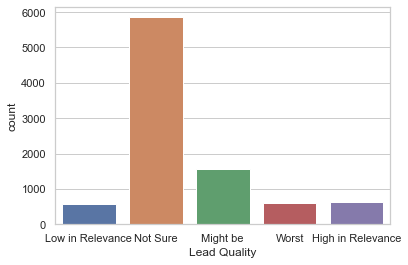

In [114]:
sns.countplot(df['Lead Quality'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

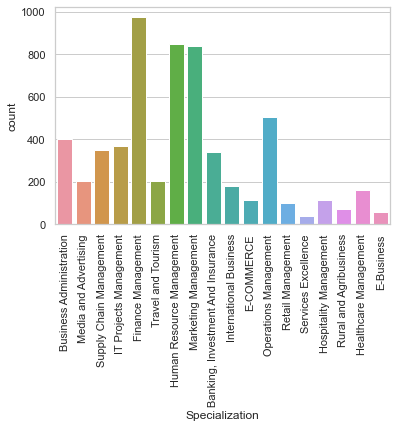

In [115]:
sns.countplot(df.Specialization)
xticks(rotation = 90)

In [116]:
# category "Others" for missing values can be made as NaN may be for the one who is student
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')


In [117]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

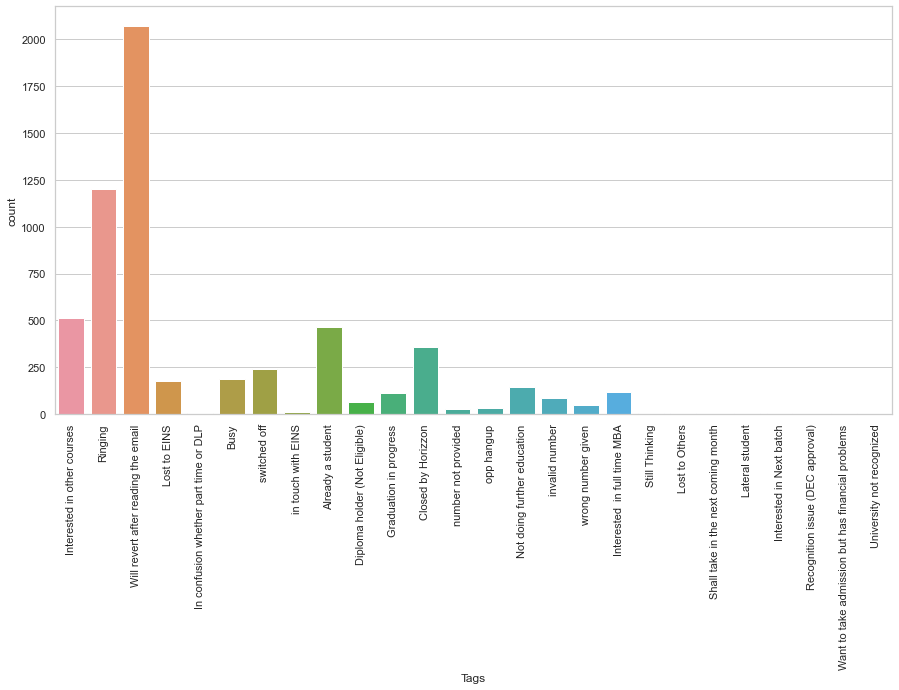

In [118]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df.Tags)
xticks(rotation = 90)

In [119]:
## NaN in tag column may be imputed by 'Will revert after reading the email'.
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

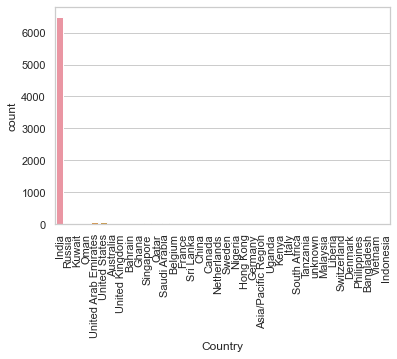

In [120]:
sns.countplot(df.Country)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

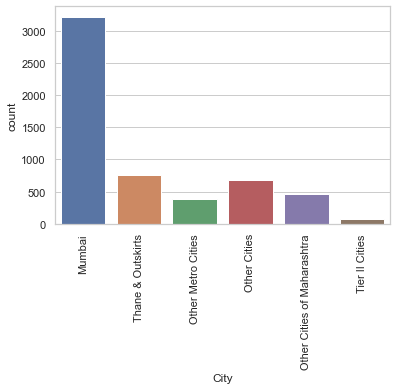

In [121]:
sns.countplot(df.City)
xticks(rotation = 90)

In [122]:
#  City Vs Country
df[(df['Country'] != 'India') & ~(df['Country'].isnull())][['Country', 'City']]

,Country,City
14,Russia,NaN
87,Kuwait,Mumbai
103,Oman,Mumbai
207,United Arab Emirates,NaN
243,United States,Mumbai
274,Australia,NaN
293,United States,NaN
312,United Kingdom,NaN
356,Bahrain,Other Cities
410,Ghana,NaN


In [123]:
#it can be noted that the columns country and city are not in sync and City contain more than 30% null values 
df.drop(['City', 'Country'], axis = 1, inplace = True)

In [124]:
# Dropping variables which cannot be imputed
df.drop(['Asymmetrique Profile Score',
            'Asymmetrique Activity Score',
            'Asymmetrique Profile Index',
            'Asymmetrique Activity Index'], axis = 1, inplace = True)

In [125]:
df['What matters most to you in choosing a course'].describe()


count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [126]:
print(df['What matters most to you in choosing a course'].unique())

['Better Career Prospects' nan 'Flexibility & Convenience' 'Other']


In [127]:
# NaN may be imputed by 'Better Career Prospects'.
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [128]:
df['What is your current occupation'].describe()


count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [129]:
print(df['What is your current occupation'].unique())

['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']


In [130]:
# NaN can be imputed as "Unemployed" in it.
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [131]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                     0.000000
Lead Origin                                     0.000000
Lead Source                                     0.390000
Do Not Email                                    0.000000
Do Not Call                                     0.000000
Converted                                       0.000000
TotalVisits                                     1.480000
Total Time Spent on Website                     0.000000
Page Views Per Visit                            1.480000
Last Activity                                   1.110000
Specialization                                  0.000000
What is your current occupation                 0.000000
What matters most to you in choosing a course   0.000000
Search                                          0.000000
Magazine                                        0.000000
Newspaper Article                               0.000000
X Education Forums                              0.000000
Newspaper                      

In [132]:
df.dropna(inplace = True)
df.shape

(9074, 28)

In [133]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                     0.000000
Lead Origin                                     0.000000
Lead Source                                     0.000000
Do Not Email                                    0.000000
Do Not Call                                     0.000000
Converted                                       0.000000
TotalVisits                                     0.000000
Total Time Spent on Website                     0.000000
Page Views Per Visit                            0.000000
Last Activity                                   0.000000
Specialization                                  0.000000
What is your current occupation                 0.000000
What matters most to you in choosing a course   0.000000
Search                                          0.000000
Magazine                                        0.000000
Newspaper Article                               0.000000
X Education Forums                              0.000000
Newspaper                      

In [134]:
print(df['Magazine'].unique())

['No']


In [135]:
print(df['I agree to pay the amount through cheque'].unique())

['No']


In [136]:
print(df['Receive More Updates About Our Courses'].unique())

['No']


In [137]:
print(df['Get updates on DM Content'].unique())

['No']


In [138]:
print(df['Update me on Supply Chain Content'].unique())

['No']


In [139]:
# Dropping the above columns as they are containing single values
df.drop(['I agree to pay the amount through cheque','Receive More Updates About Our Courses','Magazine',
            'Get updates on DM Content','Update me on Supply Chain Content'], axis = 1, inplace = True )

In [140]:
df.shape

(9074, 23)

### EDA 

In [141]:
# Inspecting the variations
((df['Lead Origin'].value_counts()/len(df))*100,2)

(Landing Page Submission   53.835133
 API                       39.431342
 Lead Add Form              6.402909
 Lead Import                0.330615
 Name: Lead Origin, dtype: float64,
 2)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

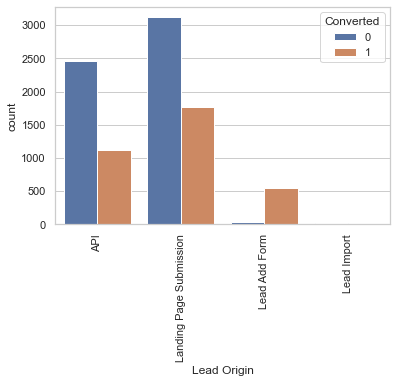

In [142]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)

#### need to focus more on generating more leads from Lead Add Form while improving lead conversion of API and Landing Page Submission origin 

In [143]:
((df['Lead Source'].value_counts()/len(df))*100,2)

(Google              31.606789
 Direct Traffic      28.025127
 Olark Chat          19.318933
 Organic Search      12.717655
 Reference            4.882081
 Welingak Website     1.421644
 Referral Sites       1.377562
 Facebook             0.341635
 bing                 0.066123
 google               0.055102
 Click2call           0.044082
 Press_Release        0.022041
 Live Chat            0.022041
 Social Media         0.022041
 Pay per Click Ads    0.011020
 WeLearn              0.011020
 testone              0.011020
 blog                 0.011020
 NC_EDM               0.011020
 youtubechannel       0.011020
 welearnblog_Home     0.011020
 Name: Lead Source, dtype: float64,
 2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

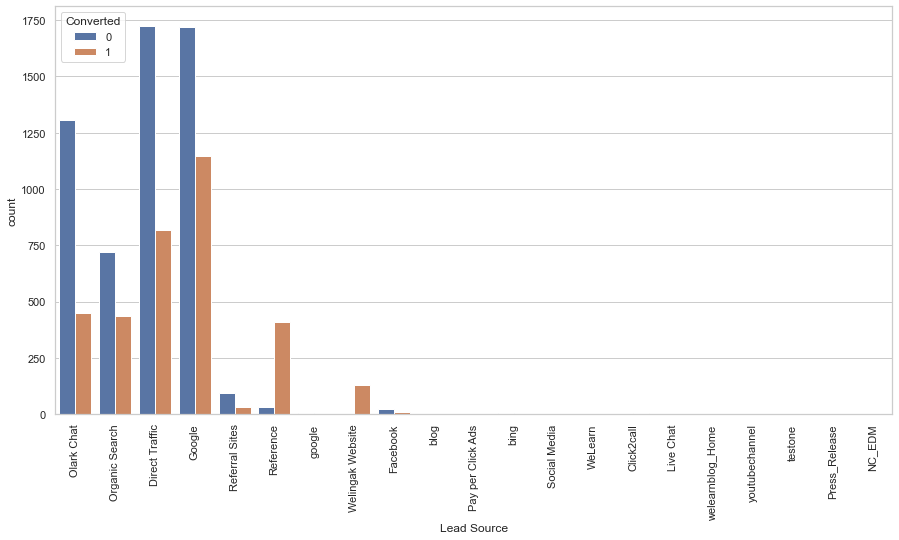

In [144]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

In [145]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Live Chat','Social Media','Press_Release' , 'WeLearn',
                                                'Pay per Click Ads', 'welearnblog_Home', 'blog','NC_EDM', 'youtubechannel',
                                                'testone' ], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

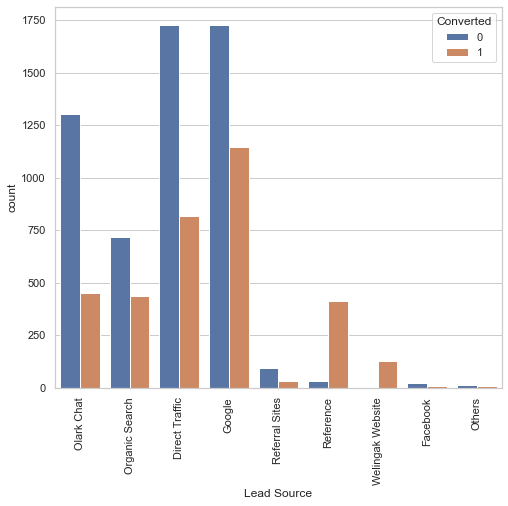

In [321]:
fig, axs = plt.subplots(figsize = (8,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

#### need to focus more on generating more leads from reference and welingak website while improving lead converion of olark chat, organic search, direct traffic, and google .

In [147]:
# Inspecting the variations
((df['Do Not Email'].value_counts()/len(df))*100,2)

(No    92.109323
 Yes    7.890677
 Name: Do Not Email, dtype: float64,
 2)

In [148]:
((df['Do Not Call'].value_counts()/len(df))*100,2)

(No    99.977959
 Yes    0.022041
 Name: Do Not Call, dtype: float64,
 2)

In [149]:
((df['Search'].value_counts()/len(df))*100,2)

(No    99.845713
 Yes    0.154287
 Name: Search, dtype: float64,
 2)

In [150]:
((df['Newspaper Article'].value_counts()/len(df))*100,2)

(No    99.977959
 Yes    0.022041
 Name: Newspaper Article, dtype: float64,
 2)

In [151]:
((df['X Education Forums'].value_counts()/len(df))*100,2)

(No    99.988980
 Yes    0.011020
 Name: X Education Forums, dtype: float64,
 2)

In [152]:
((df['Newspaper'].value_counts()/len(df))*100,2)

(No    99.988980
 Yes    0.011020
 Name: Newspaper, dtype: float64,
 2)

In [153]:
((df['Digital Advertisement'].value_counts()/len(df))*100,2)

(No    99.955918
 Yes    0.044082
 Name: Digital Advertisement, dtype: float64,
 2)

In [154]:
((df['Through Recommendations'].value_counts()/len(df))*100,2)

(No    99.922857
 Yes    0.077143
 Name: Through Recommendations, dtype: float64,
 2)

In [155]:
((df['What matters most to you in choosing a course'].value_counts()/len(df))*100,2)

(Better Career Prospects     99.977959
 Flexibility & Convenience    0.011020
 Other                        0.011020
 Name: What matters most to you in choosing a course, dtype: float64,
 2)

In [156]:
((df['A free copy of Mastering The Interview'].value_counts()/len(df))*100,2)

(No    68.172801
 Yes   31.827199
 Name: A free copy of Mastering The Interview, dtype: float64,
 2)

In [157]:
# as No Inference can be drawn with this parameter lets drop this.

df.drop(['A free copy of Mastering The Interview'], axis = 1, inplace = True)

In [158]:
# Dropping above variables as showing minimum variation
df.drop(['Do Not Email','Do Not Call','Search', 'Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations'], axis = 1, inplace = True)

In [159]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [160]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

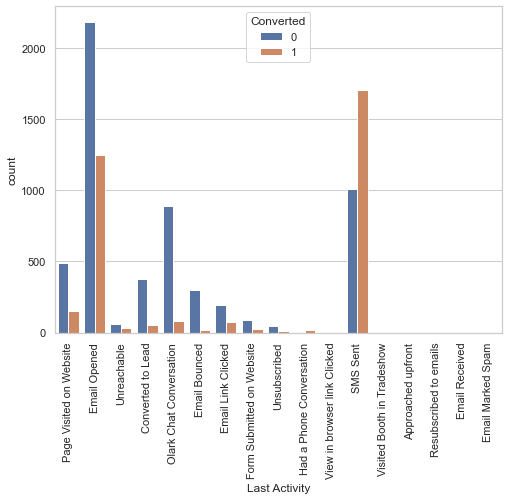

In [320]:
fig, axs = plt.subplots(figsize = (8,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

####  Need to focus on Email opened as it is their most last activity.Conversion rate for SMS Sent is highest

In [162]:
df.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

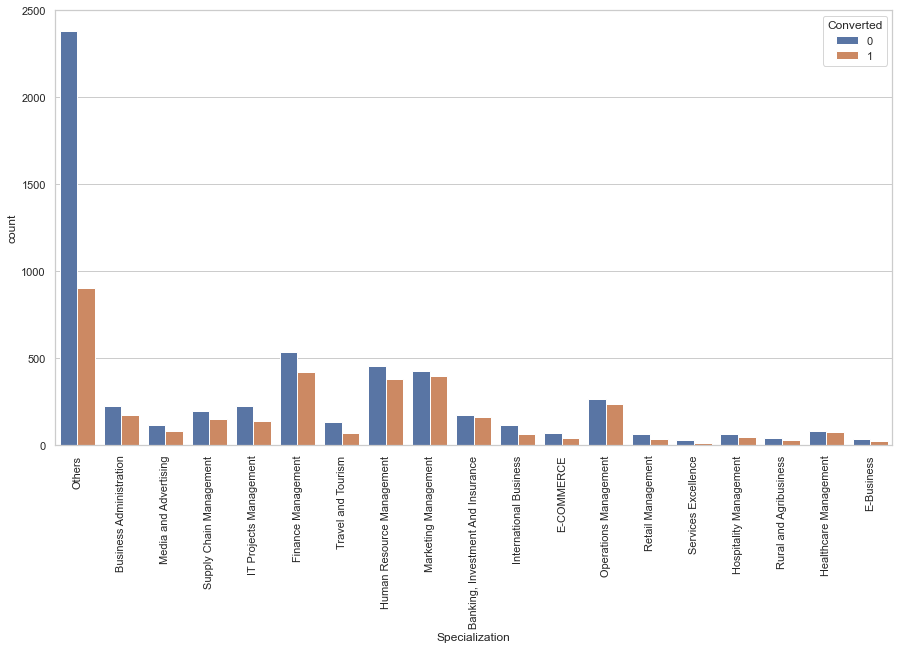

In [163]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

In [164]:
((df['What is your current occupation'].value_counts()/len(df))*100,2)

(Unemployed             89.916244
 Working Professional    7.460877
 Student                 2.270223
 Other                   0.165307
 Housewife               0.099184
 Businessman             0.088164
 Name: What is your current occupation, dtype: float64,
 2)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

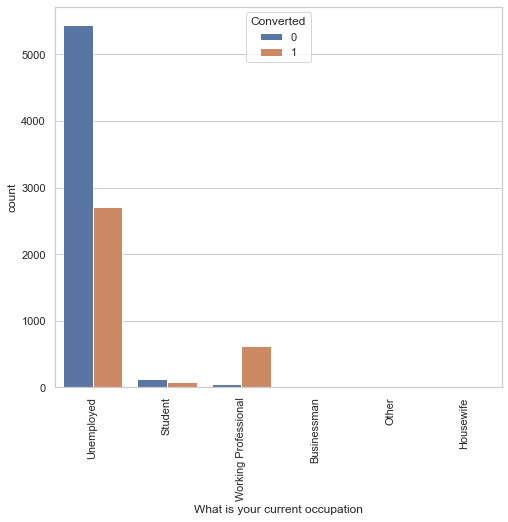

In [322]:
fig, axs = plt.subplots(figsize = (8,7))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)

#### need to focus more on generating more leads from Working Professional while improving lead converion of Unemployed

In [318]:
((df['Tags'].value_counts()/len(df))*100,2)

(Will revert after reading the email   58.882521
 Ringing                               13.081331
 Interested in other courses            5.609434
 Already a student                      5.124532
 Closed by Horizzon                     3.317170
 Others                                 3.096760
 switched off                           2.644920
 Busy                                   2.038792
 Lost to EINS                           1.895526
 Not doing further education            1.597972
 Interested  in full time MBA           1.278378
 invalid number                         0.914701
 wrong number given                     0.517963
 Name: Tags, dtype: float64,
 2)

In [166]:
df['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

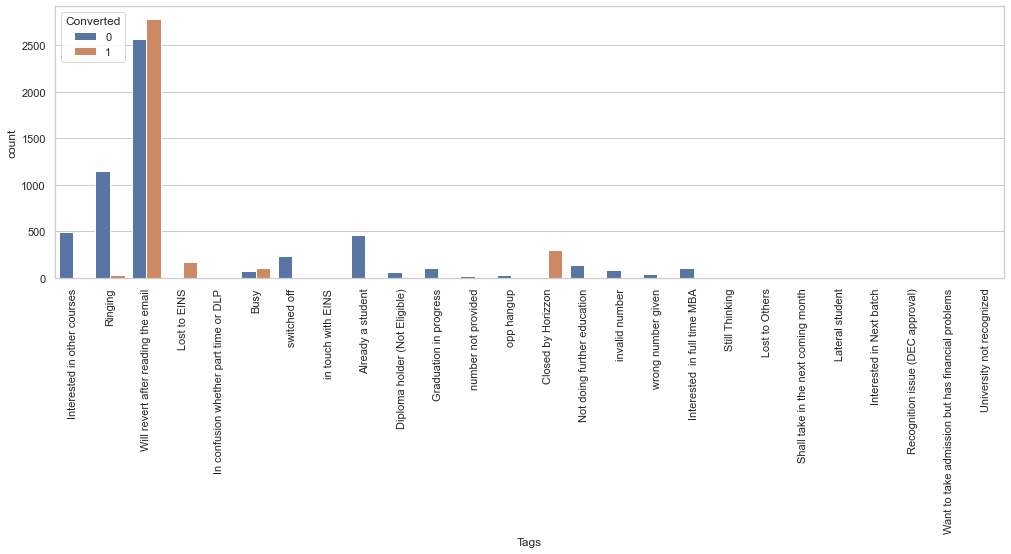

In [167]:
fig, axs = plt.subplots(figsize = (17,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

In [168]:
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Others'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

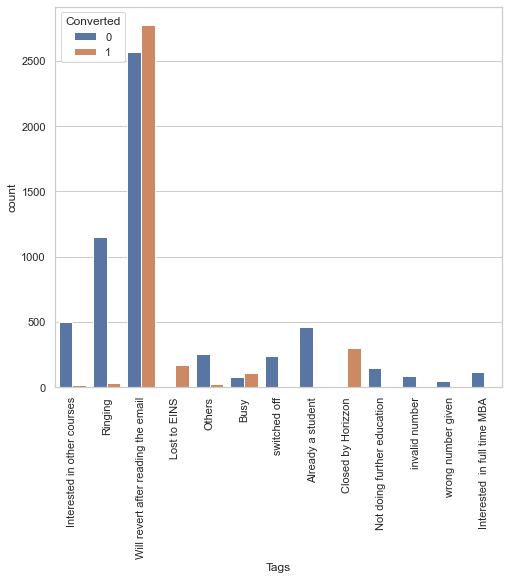

In [323]:
fig, axs = plt.subplots(figsize = (8,7))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

In [170]:
((df['Lead Quality'].value_counts()/len(df))*100,2)

(Not Sure            63.985012
 Might be            16.740137
 Worst                6.623319
 High in Relevance    6.524135
 Low in Relevance     6.127397
 Name: Lead Quality, dtype: float64,
 2)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

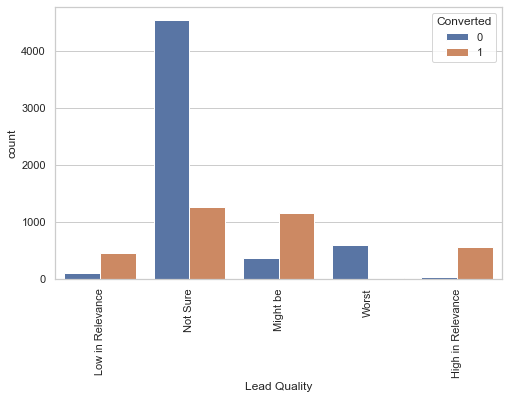

In [324]:
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
xticks(rotation = 90)

In [172]:
((df['Last Notable Activity'].value_counts()/len(df))*100,2)

(Modified                       36.003967
 Email Opened                   31.110866
 SMS Sent                       23.716112
 Page Visited on Website         3.504518
 Olark Chat Conversation         2.016751
 Email Link Clicked              1.906546
 Email Bounced                   0.661230
 Unsubscribed                    0.495922
 Unreachable                     0.352656
 Had a Phone Conversation        0.154287
 Email Marked Spam               0.022041
 Approached upfront              0.011020
 Email Received                  0.011020
 Form Submitted on Website       0.011020
 View in browser link Clicked    0.011020
 Resubscribed to emails          0.011020
 Name: Last Notable Activity, dtype: float64,
 2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

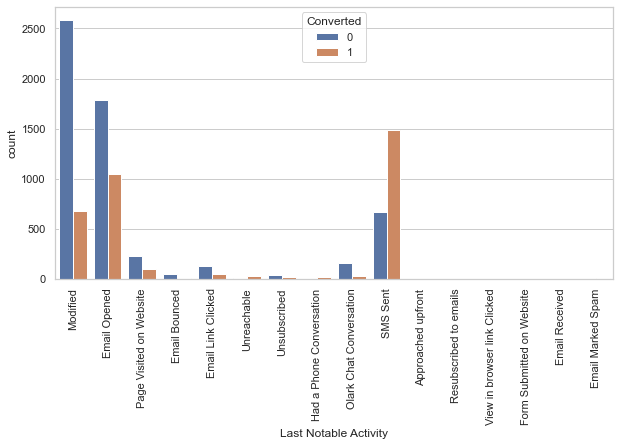

In [173]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [174]:
df.nunique()


Lead Number                        9074
Lead Origin                           4
Lead Source                           9
Converted                             2
TotalVisits                          41
Total Time Spent on Website        1717
Page Views Per Visit                114
Last Activity                        17
Specialization                       19
What is your current occupation       6
Tags                                 13
Lead Quality                          5
Last Notable Activity                16
dtype: int64

In [175]:
df.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582840.800000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000


## Outlier treatment

<AxesSubplot:xlabel='TotalVisits'>

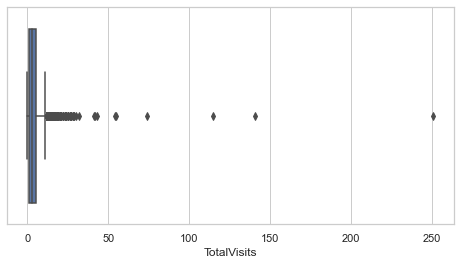

In [176]:
 plt.figure(figsize=(8, 4))
sns.boxplot(df['TotalVisits'])

In [177]:
# capping the outliers to 95% value 

percentile = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentile[0]] = percentile[0]
df['TotalVisits'][df['TotalVisits'] >= percentile[1]] = percentile[1]

<AxesSubplot:xlabel='TotalVisits'>

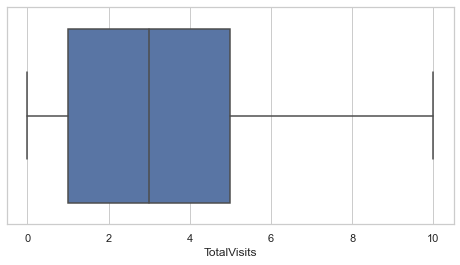

In [178]:
 plt.figure(figsize=(8, 4))
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

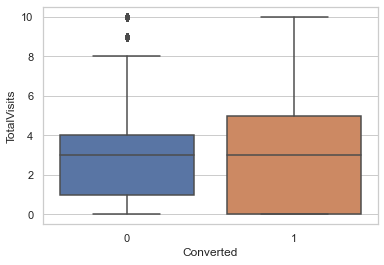

In [179]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

<AxesSubplot:xlabel='Total Time Spent on Website'>

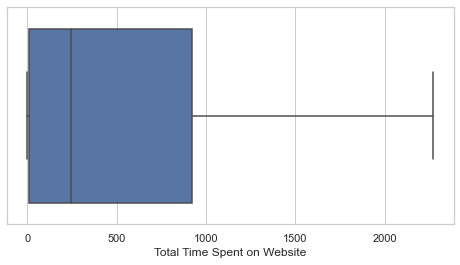

In [180]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 4))
sns.boxplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

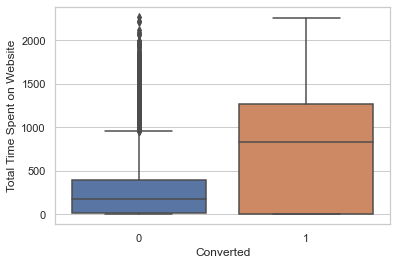

In [181]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

#### converted leads found to be spent more time on the weblise .


<AxesSubplot:xlabel='Page Views Per Visit'>

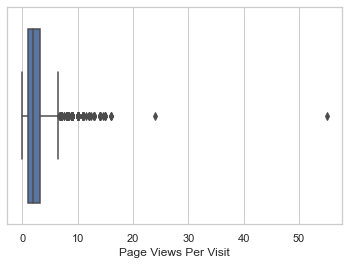

In [182]:
sns.boxplot(df['Page Views Per Visit'])

In [183]:
#  capping the outliers to 95% value 

percentile = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentile[0]] = percentile[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentile[1]] = percentile[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

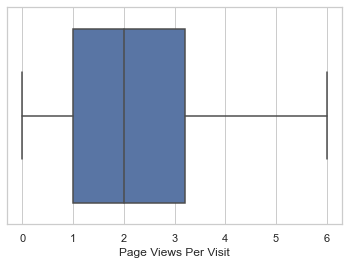

In [184]:
sns.boxplot(df['Page Views Per Visit'])


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

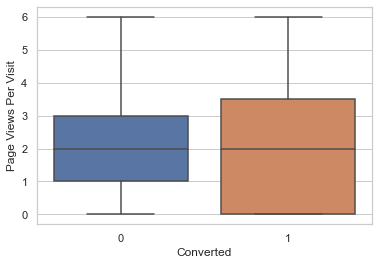

In [185]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [186]:
df.shape

(9074, 13)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  Last Notable Activit

In [188]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,660737,API,Olark Chat,0,0.000000,0,0.000000,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,660728,API,Organic Search,0,5.000000,674,2.500000,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.000000,1532,2.000000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.000000,305,1.000000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,660681,Landing Page Submission,Google,1,2.000000,1428,1.000000,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


## Data Preparation


In [189]:
# For categorical variables creating dummy features and dropping the first one.

dummy_df = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','Last Notable Activity']], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [190]:
final_df = pd.concat([df, dummy_df], axis=1)
final_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.000000,0,0.000000,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.000000,674,2.500000,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.000000,1532,2.000000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.000000,305,1.000000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [191]:
final_df = final_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
              'Tags','Lead Quality','Last Notable Activity'], axis = 1)

In [192]:
final_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.000000,0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.000000,674,2.500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.000000,1532,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.000000,305,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.000000,1428,1.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [193]:
final_df.shape

(9074, 86)

## Test-Train Split


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
# Putting feature variable to X
X = final_df.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.000000,0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.000000,674,2.500000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.000000,1532,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.000000,305,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.000000,1428,1.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [197]:
# Putting response variable to y
y = final_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [198]:
# Splitting dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [200]:
### Checking the Lead Conversion Rate
converted = (sum(final_df['Converted'])/len(final_df['Converted'].index))*100
converted

37.85541106458012

In [201]:
X_train.shape

(6351, 84)

In [202]:
X_test.shape

(2723, 84)

In [203]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.000000,0.000000,0.000000,0.535979,0.068651,0.003779,0.003936,0.320737,0.186427,0.127224,0.002677,0.051645,0.013384,0.015903,0.044717,0.034640,0.028185,0.000315,0.373799,0.000315,0.011809,0.002677,0.105338,0.070698,0.000157,0.308298,0.011022,0.006141,0.000945,0.000157,0.040309,0.006456,0.0119

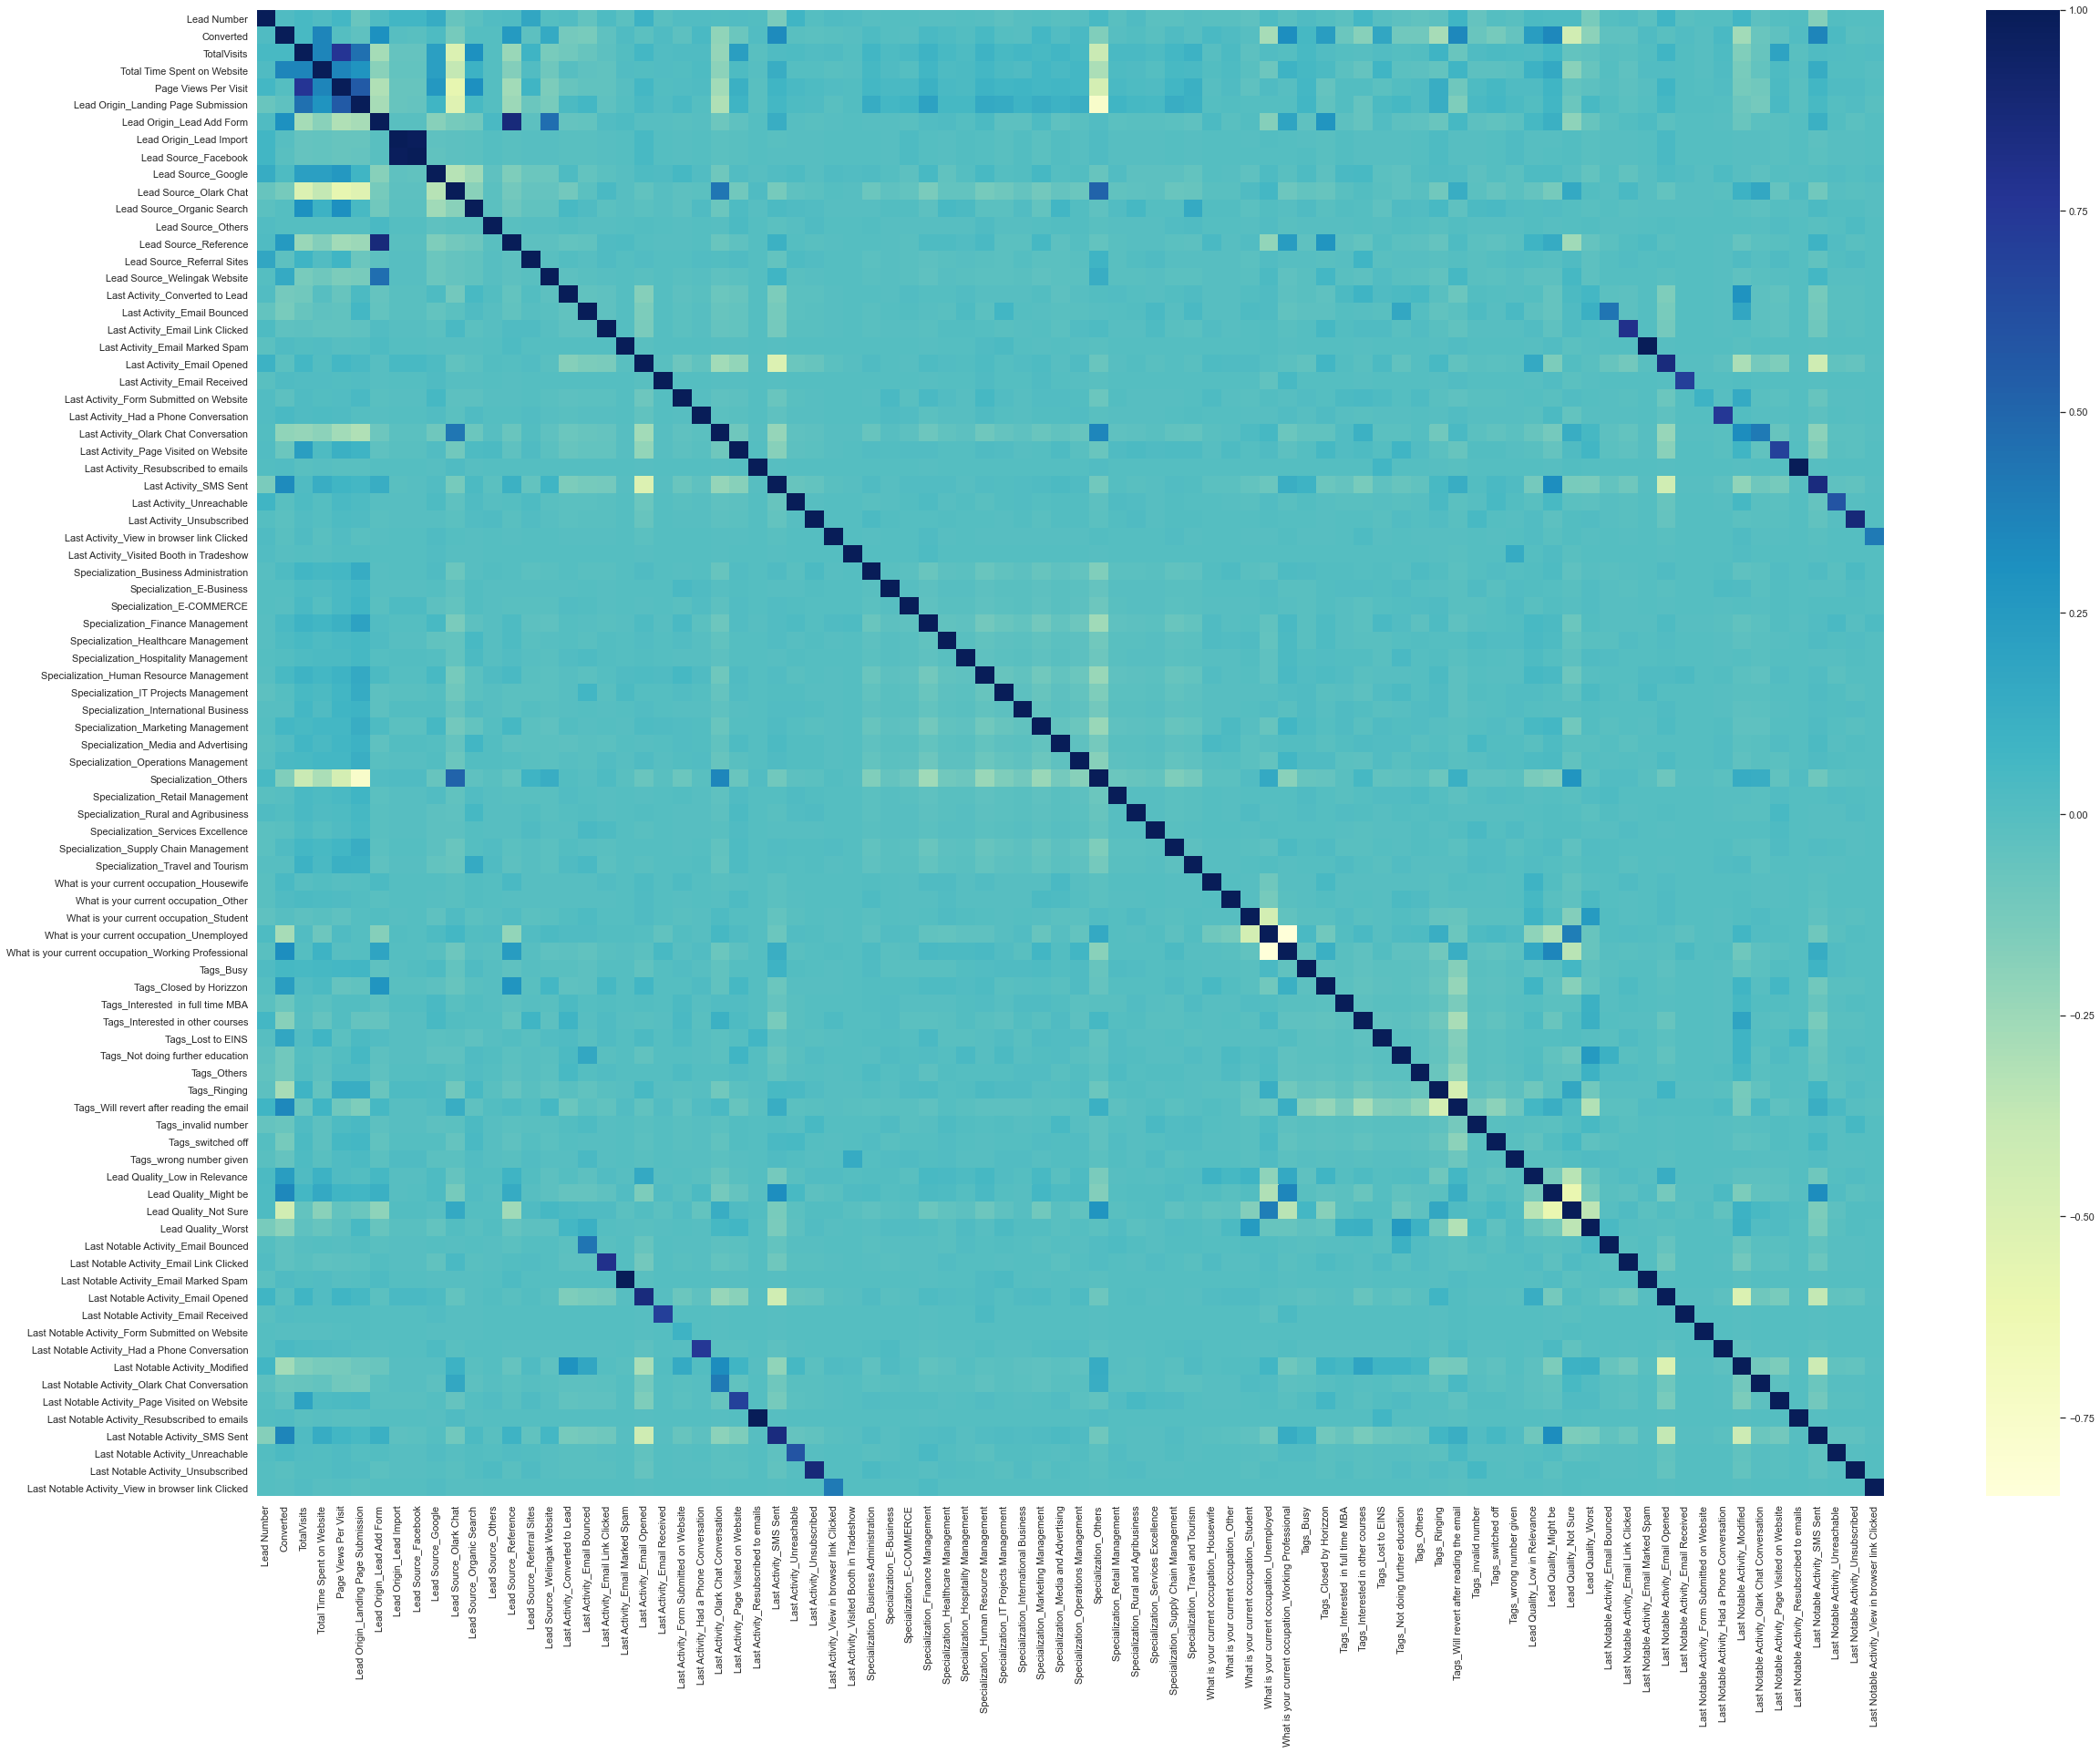

In [204]:
#  correlation matrix 
plt.figure(figsize = (40,30))       
sns.heatmap(final_df.corr(), cmap="YlGnBu")
plt.show()

#### Due to huge number of columns heatmap is not clear. there is a lot of correlation amongst dummy variables. Hence further reducing the number of columns so as to reduce multicollinearity.

## Building Model 


In [205]:
# Running Your First Training Model
# Logistic regression model
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.0
Date:                Fri, 20 Nov 2020   Deviance:                       2524.0
Time:                        18:01:47   Pearson chi2:                 3.51e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.3757   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.1921      0.086      2.237      0.025       0.024       0.360
Total Time Spent on Website                              1.1448      0.063     18.040      0.000       1.020       1.269
Page Views Per Visit                                    -0.3341      0.098     -3.400      0.001      -0.527      -0.141
Lead Origin_Landing Page Submission                     -1.0004      0.220     -4.548      0.000      -1.432      -0.569
Lead Origin_Lead Add Form                               -0.3298      1.273     -0.259      0.796      -2.825       2.165
Lead Origin_Lead Import                                 29.5793   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.4729   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2358      0.152      1.548      0.122      -0.063       0.534
Lead Source_Olark Chat                                   0.8939      0.232      3.853      0.000       0.439       1.349
Lead Source_Organic Search                               0.2533      0.208      1.216      0.224      -0.155       0.662
Lead Source_Others                                       0.7280      0.794      0.917      0.359      -0.828       2.284
Lead Source_Reference                                    1.6424      1.328      1.237      0.216      -0.960       4.245
Lead Source_Referral Sites                              -0.0472      0.489     -0.097      0.923      -1.005       0.911
Lead Source_Welingak Website                             5.2799      1.469      3.594      0.000       2.400       8.159
Last Activity_Converted to Lead                        -19.1901   9.97e+04     -0.000      1.000   -1.96e+05    1.95e+05
Last Activity_Email Bounced                            -20.7333   9.97e+04     -0.000      1.000   -1.96e+05    1.95e+05
Last Activity_Email Link Clicked                       -18.3488   9.97e+04     -0.000      1.000   -1.96e+05    1.95e+05
Last Activity_Email Marked Spam                         -0.3336   1.28e+05   -2.6e-06      1.000   -2.51e+05    2.51e+05
Last Activity_Email Opened                             -19.1800   9.97e+04     -0.000      1.000   -1.96e+05    1.95e+05
Last Activity_Email Received                             2.9134   2.38e+05   1.22e-05      1.000   -4.66e+05    4.66e+05
Last Activity_Form Submitted on Website                -19.0708   9.97e+04     -0.000      1.000   -1.96e+05    1.95e+05
Last Activity_Had a Phone Conversation                 -16

### Feature Selection Using RFE

In [206]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [207]:
rfe.support_

array([False,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False])

In [208]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 40),
 ('Lead Source_Reference', False, 65),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 29),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 28),
 ('Last Activity_Email Marked Spam', False, 46),
 ('Last Activity_Email Opened', False, 63),
 ('Last Activity_Email Received', False, 53),
 ('Last Activity_Form Submitted on Website', False, 58),
 ('Last Activity_Had a Phone Conversation', False, 4),
 ('Last Activity_Olark Chat Conversation', Fal

In [209]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [210]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 

In [211]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.3
Date:                Fri, 20 Nov 2020   Deviance:                       2672.6
Time:                        18:02:31   Pearson chi2:                 2.71e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7420      0.243     -7.182      0.000      -2.217      -1.267
Total Time Spent on Website                              1.1502      0.061     18.919      0.000       1.031       1.269
Lead Origin_Lead Add Form                                2.2665      0.368      6.158      0.000       1.545       2.988
Lead Origin_Lead Import                                  1.8030      0.770      2.343      0.019       0.295       3.311
Lead Source_Olark Chat                                   1.1597      0.139      8.328      0.000       0.887       1.433
Lead Source_Welingak Website                             3.3048      0.818      4.042      0.000       1.702       4.907
Last Activity_Email Bounced                             -1.3530      0.444     -3.044      0.002      -2.224      -0.482
What is your current occupation_Working Professional     1.2561      0.322      3.906      0.000       0.626       1.886
Tags_Busy                                                3.2407      0.343      9.452      0.000       2.569       3.913
Tags_Closed by Horizzon                                  8.0027      0.793     10.086      0.000       6.448       9.558
Tags_Lost to EINS                                        8.8781      0.769     11.547      0.000       7.371      10.385
Tags_Ringing                                            -1.9653      0.354     -5.546      0.000      -2.660      -1.271
Tags_Will revert after reading the email                 3.5305      0.244     14.466      0.000       3.052       4.009
Tags_invalid number                                    -23.6149   2.23e+04     -0.001      0.999   -4.38e+04    4.37e+04
Tags_switched off                                       -2.8326      0.643     -4.402      0.000      -4.094      -1.571
Tags_wrong number given                                -23.2846   3.03e+04     -0.001      0.999   -5.93e+04    5.93e+04
Lead Quality_Not Sure                                   -3.1625      0.141    -22.465      0.000      -3.438      -2.887
Lead Quality_Worst                                      -4.0035      0.839     -4.769      0.000      -5.649      -2.358
Last Notable Activity_Modified                          -1.0150      0.120     -8.481      0.000      -1.250      -0.780
Last Notable Activity_Olark Chat Conversation           -1.6826      0.407     -4.135      0.000      -2.480      -0.885
Last Notable Activity_SMS Sent                           2.2047      0.138     16.027      0.000       1.935       2.474
========================================================================================================================
"""

In [212]:
col1 = col.drop('Tags_invalid number',1)

In [213]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.1
Date:                Fri, 20 Nov 2020   Deviance:                       2682.3
Time:                        18:03:02   Pearson chi2:                 2.66e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8896      0.242     -7.813      0.000      -2.364      -1.416
Total Time Spent on Website                              1.1522      0.061     18.983      0.000       1.033       1.271
Lead Origin_Lead Add Form                                2.2988      0.369      6.222      0.000       1.575       3.023
Lead Origin_Lead Import                                  1.8044      0.768      2.348      0.019       0.298       3.311
Lead Source_Olark Chat                                   1.1634      0.139      8.371      0.000       0.891       1.436
Lead Source_Welingak Website                             3.2719      0.818      3.999      0.000       1.668       4.875
Last Activity_Email Bounced                             -1.3527      0.445     -3.043      0.002      -2.224      -0.481
What is your current occupation_Working Professional     1.2900      0.324      3.980      0.000       0.655       1.925
Tags_Busy                                                3.3944      0.341      9.946      0.000       2.726       4.063
Tags_Closed by Horizzon                                  8.1313      0.794     10.244      0.000       6.576       9.687
Tags_Lost to EINS                                        9.0066      0.769     11.714      0.000       7.500      10.514
Tags_Ringing                                            -1.7970      0.352     -5.112      0.000      -2.486      -1.108
Tags_Will revert after reading the email                 3.6720      0.244     15.068      0.000       3.194       4.150
Tags_switched off                                       -2.6570      0.642     -4.140      0.000      -3.915      -1.399
Tags_wrong number given                                -22.1291   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Lead Quality_Not Sure                                   -3.1515      0.140    -22.446      0.000      -3.427      -2.876
Lead Quality_Worst                                      -3.9396      0.845     -4.661      0.000      -5.596      -2.283
Last Notable Activity_Modified                          -1.0122      0.120     -8.453      0.000      -1.247      -0.777
Last Notable Activity_Olark Chat Conversation           -1.6886      0.407     -4.150      0.000      -2.486      -0.891
Last Notable Activity_SMS Sent                           2.1723      0.136     15.935      0.000       1.905       2.440
========================================================================================================================
"""

In [214]:
col2 = col1.drop('Tags_wrong number given',1)

In [215]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.0
Date:                Fri, 20 Nov 2020   Deviance:                       2688.0
Time:                        18:03:12   Pearson chi2:                 2.66e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9949      0.241     -8.284      0.000      -2.467      -1.523
Total Time Spent on Website                              1.1486      0.061     18.964      0.000       1.030       1.267
Lead Origin_Lead Add Form                                2.3134      0.371      6.236      0.000       1.586       3.040
Lead Origin_Lead Import                                  1.7467      0.750      2.328      0.020       0.276       3.217
Lead Source_Olark Chat                                   1.1620      0.139      8.367      0.000       0.890       1.434
Lead Source_Welingak Website                             3.2531      0.819      3.974      0.000       1.649       4.858
Last Activity_Email Bounced                             -1.3508      0.445     -3.039      0.002      -2.222      -0.479
What is your current occupation_Working Professional     1.3110      0.326      4.020      0.000       0.672       1.950
Tags_Busy                                                3.5046      0.340     10.322      0.000       2.839       4.170
Tags_Closed by Horizzon                                  8.2261      0.794     10.365      0.000       6.671       9.782
Tags_Lost to EINS                                        9.1010      0.768     11.843      0.000       7.595      10.607
Tags_Ringing                                            -1.6832      0.349     -4.820      0.000      -2.368      -0.999
Tags_Will revert after reading the email                 3.7773      0.242     15.583      0.000       3.302       4.252
Tags_switched off                                       -2.5402      0.640     -3.969      0.000      -3.795      -1.286
Lead Quality_Not Sure                                   -3.1510      0.140    -22.471      0.000      -3.426      -2.876
Lead Quality_Worst                                      -3.8701      0.852     -4.541      0.000      -5.540      -2.200
Last Notable Activity_Modified                          -1.0077      0.120     -8.417      0.000      -1.242      -0.773
Last Notable Activity_Olark Chat Conversation           -1.6863      0.407     -4.148      0.000      -2.483      -0.889
Last Notable Activity_SMS Sent                           2.1629      0.136     15.928      0.000       1.897       2.429
========================================================================================================================
"""

In [216]:
col3 = col2.drop('Lead Origin_Lead Import',1)

In [217]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1346.7
Date:                Fri, 20 Nov 2020   Deviance:                       2693.4
Time:                        18:09:47   Pearson chi2:                 2.67e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9727      0.240     -8.205      0.000      -2.444      -1.501
Total Time Spent on Website                              1.1351      0.060     18.876      0.000       1.017       1.253
Lead Origin_Lead Add Form                                2.2810      0.371      6.148      0.000       1.554       3.008
Lead Source_Olark Chat                                   1.1358      0.138      8.224      0.000       0.865       1.406
Lead Source_Welingak Website                             3.2589      0.819      3.980      0.000       1.654       4.864
Last Activity_Email Bounced                             -1.3588      0.444     -3.058      0.002      -2.230      -0.488
What is your current occupation_Working Professional     1.3117      0.325      4.036      0.000       0.675       1.949
Tags_Busy                                                3.5052      0.339     10.329      0.000       2.840       4.170
Tags_Closed by Horizzon                                  8.2217      0.793     10.364      0.000       6.667       9.776
Tags_Lost to EINS                                        9.0985      0.768     11.842      0.000       7.593      10.604
Tags_Ringing                                            -1.6802      0.349     -4.810      0.000      -2.365      -0.996
Tags_Will revert after reading the email                 3.7862      0.243     15.613      0.000       3.311       4.261
Tags_switched off                                       -2.5418      0.639     -3.981      0.000      -3.793      -1.290
Lead Quality_Not Sure                                   -3.1635      0.140    -22.554      0.000      -3.438      -2.889
Lead Quality_Worst                                      -3.8738      0.852     -4.548      0.000      -5.543      -2.204
Last Notable Activity_Modified                          -1.0131      0.120     -8.474      0.000      -1.247      -0.779
Last Notable Activity_Olark Chat Conversation           -1.6846      0.406     -4.154      0.000      -2.480      -0.890
Last Notable Activity_SMS Sent                           2.1543      0.136     15.888      0.000       1.889       2.420
========================================================================================================================
"""

In [218]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.177704
1012   0.118137
9226   0.000451
4750   0.935207
7987   0.994724
1281   0.993363
2880   0.087028
4971   0.936099
7536   0.992784
1248   0.003267
dtype: float64

In [219]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.77703977e-01, 1.18137315e-01, 4.51492080e-04, 9.35207433e-01,
       9.94724310e-01, 9.93362699e-01, 8.70284015e-02, 9.36098713e-01,
       9.92784400e-01, 3.26724660e-03])

In [220]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.177704,3009
1,0,0.118137,1012
2,0,0.000451,9226
3,1,0.935207,4750
4,1,0.994724,7987


In [221]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.177704,3009,0
1,0,0.118137,1012,0
2,0,0.000451,9226,0
3,1,0.935207,4750,1
4,1,0.994724,7987,1


In [224]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9214296961108487


In [225]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3701  204]
 [ 295 2151]]


In [227]:
# Predicted     not_converted    converted 
# Actual
# not_converted      3701          204
# converted          295          2151  

In [226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [232]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,3.260000
10,Tags_Will revert after reading the email,3.190000
14,Last Notable Activity_Modified,1.860000
1,Lead Origin_Lead Add Form,1.810000
16,Last Notable Activity_SMS Sent,1.700000
2,Lead Source_Olark Chat,1.630000
9,Tags_Ringing,1.540000
0,Total Time Spent on Website,1.420000
3,Lead Source_Welingak Website,1.370000
5,What is your current occupation_Working Profes...,1.270000


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [233]:
# Metrics beyond simply accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [234]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8793949304987735

In [235]:
# Let us calculate specificity
TN / float(TN+FP)

0.9477592829705506

In [236]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.05224071702944942


In [237]:
# positive predictive value 
print (TP / float(TP+FP))

0.913375796178344


In [238]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9261761761761762


###  Plotting the ROC Curve


An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [240]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [241]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob,
                                         drop_intermediate = False )

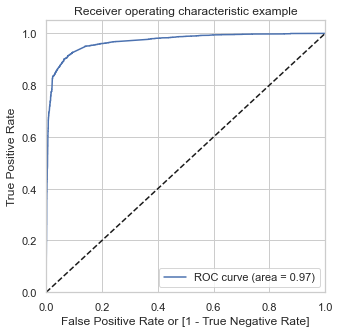

In [242]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [243]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.177704,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.118137,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000451,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.935207,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.994724,7987,1,1,1,1,1,1,1,1,1,1,1


In [244]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.385136 1.000000 0.000000
0.100000 0.100000  0.834514 0.968520 0.750576
0.200000 0.200000  0.891198 0.951349 0.853521
0.300000 0.300000  0.915919 0.917416 0.914981
0.400000 0.400000  0.920170 0.903516 0.930602
0.500000 0.500000  0.921430 0.879395 0.947759
0.600000 0.600000  0.921430 0.849959 0.966197
0.700000 0.700000  0.918753 0.825020 0.977465
0.800000 0.800000  0.896237 0.755928 0.984123
0.900000 0.900000  0.869312 0.673344 0.992061


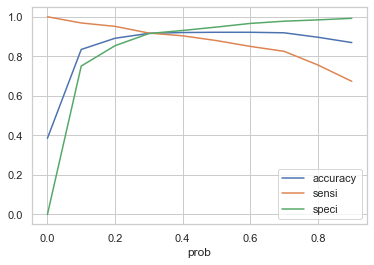

In [245]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [251]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.177704,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.118137,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000451,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.935207,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.994724,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [252]:
# Assigning Lead Score out of 100

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.177704,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.118137,1012,0,1,1,0,0,0,0,0,0,0,0,0,12
2,0,0.000451,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.935207,4750,1,1,1,1,1,1,1,1,1,1,1,1,94
4,1,0.994724,7987,1,1,1,1,1,1,1,1,1,1,1,1,99


In [253]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.915918752952291

In [254]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [255]:
# sensitivity 
TP / float(TP+FN)

0.9174161896974653

In [256]:
#  specificity
TN / float(TN+FP)

0.9149807938540333

In [257]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.08501920614596671


In [258]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8711180124223602


In [259]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9464900662251655


In [260]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3701,  204],
       [ 295, 2151]], dtype=int64)

In [ ]:
# Predicted     not_onverted    onverted 
# Actual
# not_onverted      3701          204
# onverted          295          2151  

In [261]:
## Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.913375796178344

In [262]:
## Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8793949304987735

### Using sklearn utilities for the same

In [263]:
from sklearn.metrics import precision_score, recall_score


In [264]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)


0.913375796178344

In [265]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.8793949304987735

In [266]:
# Precision recall tradeoff

from sklearn.metrics import precision_recall_curve


In [267]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [249]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Converted_prob'])


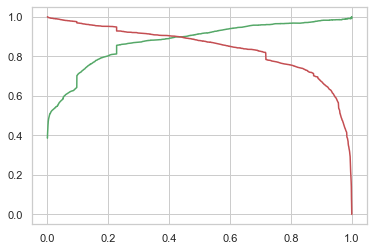

In [268]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [269]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website',
                                                                                                            'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [270]:
X_test = X_test[col3]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3271,-0.591008,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1490,1.894051,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7936,-0.743117,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4216,-0.878732,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3830,-0.578179,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [271]:
X_test_sm = sm.add_constant(X_test)


In [272]:
y_test_pred = res.predict(X_test_sm)


In [273]:
y_test_pred[:10]


3271   0.117022
1490   0.994909
7936   0.100326
4216   0.998528
3830   0.118535
1800   0.907695
6507   0.004536
4821   0.000705
4223   0.994787
4714   0.097537
dtype: float64

In [274]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [275]:
# Let's see the head
y_pred_1.head()

,0
3271,0.117022
1490,0.994909
7936,0.100326
4216,0.998528
3830,0.118535


In [276]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [277]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [278]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [279]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [280]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.117022
1,1,1490,0.994909
2,0,7936,0.100326
3,1,4216,0.998528
4,0,3830,0.118535


In [281]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [284]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.117022
1,1,1490,0.994909
2,0,7936,0.100326
3,1,4216,0.998528
4,0,3830,0.118535


In [286]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [287]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.117022,0
1,1,1490,0.994909,1
2,0,7936,0.100326,0
3,1,4216,0.998528,1
4,0,3830,0.118535,0


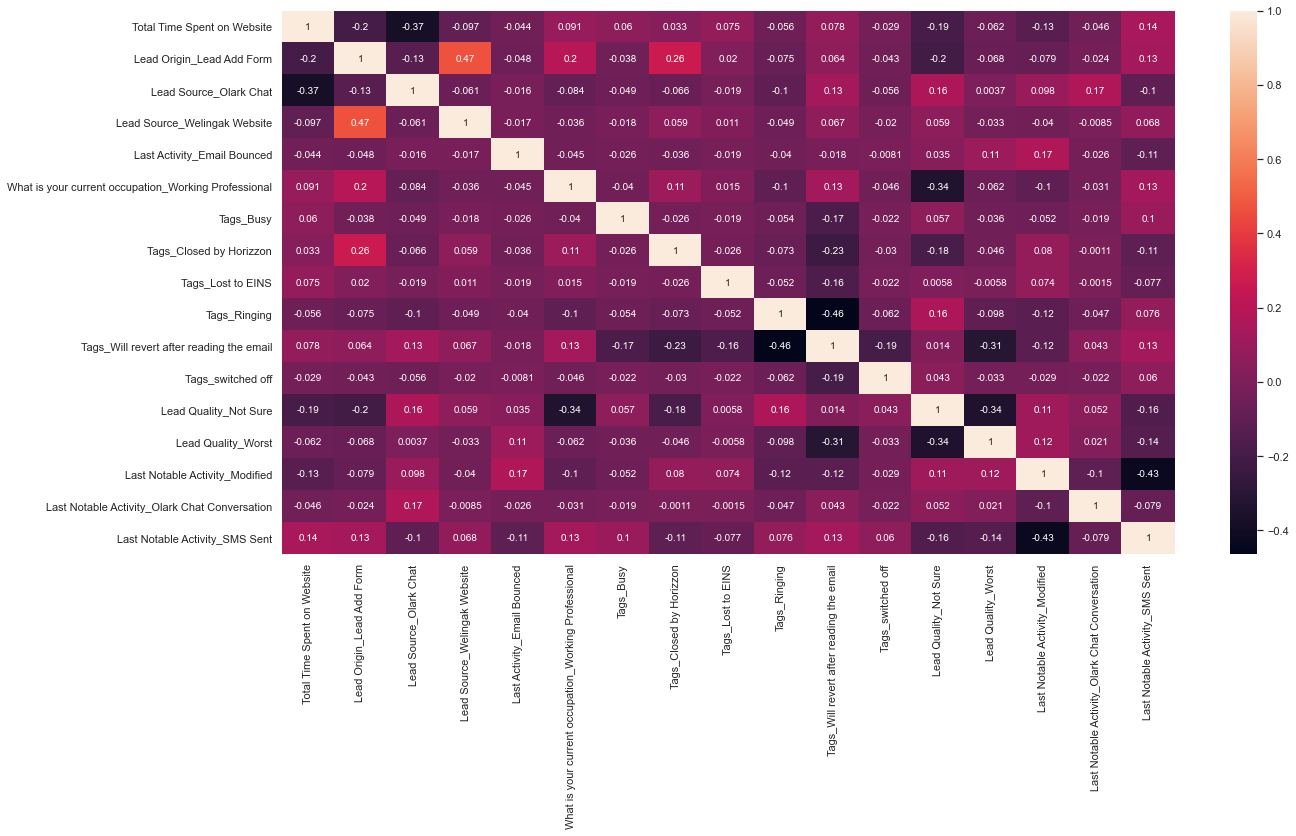

In [299]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col3].corr(),annot = True)
plt.show()

In [288]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9081894968784429

In [289]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1579,  155],
       [  95,  894]], dtype=int64)

In [ ]:
# Predicted     not_converted    converted 
# Actual
# not_converted      1579         155
# converted          95           894  

In [290]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [291]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.9039433771486349

In [292]:
# Let us calculate specificity
TN / float(TN+FP)

0.9106113033448674

In [294]:
# Calculate false postive rate - predicting conversion when lead has not converted
print(FP/ float(TN+FP))

0.08938869665513265


In [295]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9432497013142175


In [293]:
# Precision - positive predictive value 
print (TP / float(TP+FP))

0.8522402287893232


###  precision of >0.80 in test data too is achieved 